In [1]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from ruamel.yaml.scalarfloat import ScalarFloat

In [4]:
# creating paths
path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-11-24' # 2
config_name = 'config_001_hollow10MR.yaml' # 'config_001_ebert10M.yaml'
model_name = 'model_86999.pt' #  'model_24999.pt'

#config_name = 'config_001_r07.yaml' 
#model_name = 'model_84999_hollowr07.pt' 
config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)

In [14]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'CRMLBJF' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.logit_type = 'Direct'
cfg.sampler.num_corrector_steps = 3
cfg.sampler.corrector_entry_time = ScalarFloat(0.2)
cfg.sampler.num_steps = 10000
cfg.sampler.is_ordinal = True

#print(cfg)
device = torch.device(cfg.device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)
state['model'].eval()

number of parameters:  11452931
ema state dict function


In [15]:
n_samples = 64
samples = sampler.sample(model, n_samples)
saved_samples = samples

8081it [09:10, 13.61it/s]

corrector
corrector


8083it [09:10,  8.41it/s]

corrector


8085it [09:11,  6.16it/s]

corrector
corrector


8086it [09:11,  5.63it/s]

corrector


8088it [09:11,  4.69it/s]

corrector
corrector


8089it [09:12,  4.70it/s]

corrector


8091it [09:12,  3.97it/s]

corrector
corrector


8092it [09:13,  4.29it/s]

corrector


8094it [09:13,  3.66it/s]

corrector


8095it [09:13,  4.04it/s]

corrector
corrector


8096it [09:14,  3.65it/s]

corrector


8098it [09:14,  3.93it/s]

corrector
corrector


8099it [09:14,  3.74it/s]

corrector


8101it [09:15,  3.85it/s]

corrector
corrector


8102it [09:15,  3.82it/s]

corrector


8104it [09:16,  3.79it/s]

corrector
corrector


8105it [09:16,  3.92it/s]

corrector


8107it [09:17,  3.70it/s]

corrector
corrector


8108it [09:17,  4.03it/s]

corrector


8110it [09:17,  3.59it/s]

corrector


8111it [09:18,  4.00it/s]

corrector
corrector


8112it [09:18,  3.56it/s]

corrector


8114it [09:19,  3.92it/s]

corrector
corrector


8115it [09:19,  3.65it/s]

corrector


8117it [09:19,  3.87it/s]

corrector
corrector


8118it [09:20,  3.74it/s]

corrector


8120it [09:20,  3.82it/s]

corrector
corrector


8121it [09:20,  3.88it/s]

corrector


8123it [09:21,  3.74it/s]

corrector
corrector


8124it [09:21,  4.05it/s]

corrector


8126it [09:22,  3.61it/s]

corrector


8127it [09:22,  4.02it/s]

corrector
corrector


8128it [09:22,  3.63it/s]

corrector


8130it [09:23,  3.92it/s]

corrector
corrector


8131it [09:23,  3.73it/s]

corrector


8133it [09:24,  3.83it/s]

corrector
corrector


8134it [09:24,  3.83it/s]

corrector


8136it [09:25,  3.77it/s]

corrector
corrector


8137it [09:25,  3.91it/s]

corrector


8139it [09:25,  3.70it/s]

corrector
corrector


8140it [09:26,  4.03it/s]

corrector


8142it [09:26,  3.59it/s]

corrector


8143it [09:26,  4.00it/s]

corrector
corrector


8144it [09:27,  3.56it/s]

corrector


8146it [09:27,  3.92it/s]

corrector
corrector


8147it [09:28,  3.67it/s]

corrector


8149it [09:28,  3.85it/s]

corrector
corrector


8150it [09:28,  3.73it/s]

corrector


8152it [09:29,  3.82it/s]

corrector
corrector


8153it [09:29,  3.83it/s]

corrector


8155it [09:30,  3.76it/s]

corrector
corrector


8156it [09:30,  3.89it/s]

corrector


8158it [09:31,  3.69it/s]

corrector
corrector


8159it [09:31,  4.02it/s]

corrector


8161it [09:31,  3.59it/s]

corrector


8162it [09:32,  4.01it/s]

corrector
corrector


8163it [09:32,  3.57it/s]

corrector


8165it [09:32,  3.92it/s]

corrector
corrector


8166it [09:33,  3.66it/s]

corrector


8168it [09:33,  3.86it/s]

corrector
corrector


8169it [09:34,  3.73it/s]

corrector


8171it [09:34,  3.81it/s]

corrector
corrector


8172it [09:34,  3.82it/s]

corrector


8174it [09:35,  3.75it/s]

corrector
corrector


8175it [09:35,  4.01it/s]

corrector


8177it [09:36,  3.65it/s]

corrector
corrector


8178it [09:36,  4.05it/s]

corrector


8180it [09:37,  3.55it/s]

corrector


8181it [09:37,  3.97it/s]

corrector
corrector


8182it [09:37,  3.60it/s]

corrector


8184it [09:38,  3.90it/s]

corrector
corrector


8185it [09:38,  3.71it/s]

corrector


8187it [09:38,  3.83it/s]

corrector
corrector


8188it [09:39,  3.82it/s]

corrector


8190it [09:39,  3.78it/s]

corrector
corrector


8191it [09:39,  3.93it/s]

corrector


8193it [09:40,  3.68it/s]

corrector
corrector


8194it [09:40,  4.03it/s]

corrector


8196it [09:41,  3.58it/s]

corrector


8197it [09:41,  3.99it/s]

corrector
corrector


8198it [09:41,  3.60it/s]

corrector


8200it [09:42,  3.91it/s]

corrector
corrector


8201it [09:42,  3.72it/s]

corrector


8203it [09:43,  3.85it/s]

corrector
corrector


8204it [09:43,  3.82it/s]

corrector


8206it [09:44,  3.79it/s]

corrector
corrector


8207it [09:44,  3.90it/s]

corrector


8209it [09:44,  3.71it/s]

corrector
corrector


8210it [09:45,  4.01it/s]

corrector


8212it [09:45,  3.62it/s]

corrector
corrector


8213it [09:45,  4.02it/s]

corrector


8215it [09:46,  3.52it/s]

corrector


8216it [09:46,  3.95it/s]

corrector
corrector


8217it [09:47,  3.61it/s]

corrector


8219it [09:47,  3.88it/s]

corrector
corrector


8220it [09:47,  3.74it/s]

corrector


8222it [09:48,  3.82it/s]

corrector
corrector


8223it [09:48,  3.83it/s]

corrector


8225it [09:49,  3.77it/s]

corrector
corrector


8226it [09:49,  3.92it/s]

corrector


8228it [09:50,  3.68it/s]

corrector
corrector


8229it [09:50,  4.04it/s]

corrector


8231it [09:50,  3.58it/s]

corrector


8232it [09:51,  3.99it/s]

corrector
corrector


8233it [09:51,  3.59it/s]

corrector


8235it [09:51,  3.91it/s]

corrector
corrector


8236it [09:52,  3.70it/s]

corrector


8238it [09:52,  3.85it/s]

corrector
corrector


8239it [09:53,  3.76it/s]

corrector


8241it [09:53,  3.80it/s]

corrector
corrector


8242it [09:53,  3.88it/s]

corrector


8244it [09:54,  3.73it/s]

corrector
corrector


8245it [09:54,  3.99it/s]

corrector


8247it [09:55,  3.63it/s]

corrector
corrector


8248it [09:55,  4.03it/s]

corrector


8250it [09:56,  3.55it/s]

corrector


8251it [09:56,  3.96it/s]

corrector
corrector


8252it [09:56,  3.58it/s]

corrector


8254it [09:57,  3.89it/s]

corrector
corrector


8255it [09:57,  3.70it/s]

corrector


8257it [09:57,  3.84it/s]

corrector
corrector


8258it [09:58,  3.82it/s]

corrector


8260it [09:58,  3.79it/s]

corrector
corrector


8261it [09:59,  3.90it/s]

corrector


8263it [09:59,  3.71it/s]

corrector
corrector


8264it [09:59,  4.01it/s]

corrector


8266it [10:00,  3.60it/s]

corrector


8267it [10:00,  4.01it/s]

corrector
corrector


8269it [10:01,  3.51it/s]

corrector


8270it [10:01,  3.93it/s]

corrector
corrector


8271it [10:01,  3.63it/s]

corrector


8273it [10:02,  3.87it/s]

corrector
corrector


8274it [10:02,  3.74it/s]

corrector


8276it [10:03,  3.82it/s]

corrector
corrector


8277it [10:03,  3.83it/s]

corrector


8279it [10:03,  3.76it/s]

corrector
corrector


8280it [10:04,  3.97it/s]

corrector


8282it [10:04,  3.65it/s]

corrector
corrector


8283it [10:04,  4.00it/s]

corrector


8285it [10:05,  3.57it/s]

corrector


8286it [10:05,  3.98it/s]

corrector
corrector


8287it [10:06,  3.57it/s]

corrector


8289it [10:06,  3.91it/s]

corrector
corrector


8290it [10:06,  3.66it/s]

corrector


8292it [10:07,  3.85it/s]

corrector
corrector


8293it [10:07,  3.72it/s]

corrector


8295it [10:08,  3.81it/s]

corrector
corrector


8296it [10:08,  3.84it/s]

corrector


8298it [10:09,  3.75it/s]

corrector
corrector


8299it [10:09,  3.97it/s]

corrector


8301it [10:09,  3.66it/s]

corrector
corrector


8302it [10:10,  4.03it/s]

corrector


8304it [10:10,  3.56it/s]

corrector


8305it [10:10,  3.98it/s]

corrector
corrector


8306it [10:11,  3.60it/s]

corrector


8308it [10:11,  3.90it/s]

corrector
corrector


8309it [10:12,  3.71it/s]

corrector


8311it [10:12,  3.84it/s]

corrector
corrector


8312it [10:12,  3.76it/s]

corrector


8314it [10:13,  3.80it/s]

corrector
corrector


8315it [10:13,  3.92it/s]

corrector


8317it [10:14,  3.71it/s]

corrector
corrector


8318it [10:14,  4.03it/s]

corrector


8320it [10:15,  3.60it/s]

corrector


8321it [10:15,  4.01it/s]

corrector
corrector


8323it [10:15,  3.52it/s]

corrector


8324it [10:16,  3.94it/s]

corrector
corrector


8325it [10:16,  3.60it/s]

corrector


8327it [10:16,  3.89it/s]

corrector
corrector


8328it [10:17,  3.71it/s]

corrector


8330it [10:17,  3.84it/s]

corrector
corrector


8331it [10:18,  3.86it/s]

corrector


8333it [10:18,  3.77it/s]

corrector
corrector


8334it [10:18,  3.94it/s]

corrector


8336it [10:19,  3.67it/s]

corrector
corrector


8337it [10:19,  4.04it/s]

corrector


8339it [10:20,  3.57it/s]

corrector


8340it [10:20,  3.98it/s]

corrector
corrector


8341it [10:20,  3.60it/s]

corrector


8343it [10:21,  3.90it/s]

corrector
corrector


8344it [10:21,  3.72it/s]

corrector


8346it [10:22,  3.84it/s]

corrector
corrector


8347it [10:22,  3.83it/s]

corrector


8349it [10:22,  3.78it/s]

corrector
corrector


8350it [10:23,  3.90it/s]

corrector


8352it [10:23,  3.71it/s]

corrector
corrector


8353it [10:24,  4.01it/s]

corrector


8355it [10:24,  3.60it/s]

corrector


8356it [10:24,  4.01it/s]

corrector
corrector


8358it [10:25,  3.52it/s]

corrector


8359it [10:25,  3.93it/s]

corrector
corrector


8360it [10:25,  3.72it/s]

corrector


8362it [10:26,  3.85it/s]

corrector
corrector


8363it [10:26,  3.75it/s]

corrector


8365it [10:27,  3.81it/s]

corrector
corrector


8366it [10:27,  3.86it/s]

corrector


8368it [10:28,  3.72it/s]

corrector
corrector


8369it [10:28,  4.00it/s]

corrector


8371it [10:28,  3.63it/s]

corrector
corrector


8372it [10:29,  4.03it/s]

corrector


8374it [10:29,  3.54it/s]

corrector


8375it [10:30,  3.96it/s]

corrector
corrector


8376it [10:30,  3.59it/s]

corrector


8378it [10:30,  3.90it/s]

corrector
corrector


8379it [10:31,  3.70it/s]

corrector


8381it [10:31,  3.85it/s]

corrector
corrector


8382it [10:31,  3.81it/s]

corrector


8384it [10:32,  3.79it/s]

corrector
corrector


8385it [10:32,  3.89it/s]

corrector


8387it [10:33,  3.71it/s]

corrector
corrector


8388it [10:33,  4.04it/s]

corrector


8390it [10:34,  3.59it/s]

corrector


8391it [10:34,  4.01it/s]

corrector
corrector


8392it [10:34,  3.64it/s]

corrector


8394it [10:35,  3.91it/s]

corrector
corrector


8395it [10:35,  3.71it/s]

corrector


8397it [10:36,  3.84it/s]

corrector
corrector


8398it [10:36,  3.82it/s]

corrector


8400it [10:36,  3.78it/s]

corrector
corrector


8401it [10:37,  3.90it/s]

corrector


8403it [10:37,  3.70it/s]

corrector
corrector


8404it [10:37,  4.00it/s]

corrector


8406it [10:38,  3.60it/s]

corrector


8407it [10:38,  4.02it/s]

corrector
corrector


8409it [10:39,  3.52it/s]

corrector


8410it [10:39,  3.95it/s]

corrector
corrector


8411it [10:39,  3.58it/s]

corrector


8413it [10:40,  3.89it/s]

corrector
corrector


8414it [10:40,  3.68it/s]

corrector


8416it [10:41,  3.78it/s]

corrector
corrector


8417it [10:41,  3.76it/s]

corrector


8419it [10:42,  3.71it/s]

corrector
corrector


8420it [10:42,  3.79it/s]

corrector


8422it [10:42,  3.63it/s]

corrector
corrector


8423it [10:43,  3.91it/s]

corrector


8425it [10:43,  3.54it/s]

corrector


8426it [10:43,  3.93it/s]

corrector
corrector


8428it [10:44,  3.48it/s]

corrector


8429it [10:44,  3.90it/s]

corrector
corrector


8430it [10:45,  3.59it/s]

corrector


8432it [10:45,  3.87it/s]

corrector
corrector


8433it [10:45,  3.73it/s]

corrector


8435it [10:46,  3.82it/s]

corrector
corrector


8436it [10:46,  3.83it/s]

corrector


8438it [10:47,  3.76it/s]

corrector
corrector


8439it [10:47,  3.89it/s]

corrector


8441it [10:48,  3.69it/s]

corrector
corrector


8442it [10:48,  4.00it/s]

corrector


8444it [10:48,  3.59it/s]

corrector


8445it [10:49,  4.00it/s]

corrector
corrector


8447it [10:49,  3.51it/s]

corrector


8448it [10:49,  3.93it/s]

corrector
corrector


8449it [10:50,  3.62it/s]

corrector


8451it [10:50,  3.88it/s]

corrector
corrector


8452it [10:51,  3.74it/s]

corrector


8454it [10:51,  3.82it/s]

corrector
corrector


8455it [10:51,  3.81it/s]

corrector


8457it [10:52,  3.77it/s]

corrector
corrector


8458it [10:52,  3.91it/s]

corrector


8460it [10:53,  3.69it/s]

corrector
corrector


8461it [10:53,  4.05it/s]

corrector


8463it [10:54,  3.58it/s]

corrector


8464it [10:54,  3.99it/s]

corrector
corrector


8465it [10:54,  3.57it/s]

corrector


8467it [10:55,  3.92it/s]

corrector
corrector


8468it [10:55,  3.66it/s]

corrector


8470it [10:55,  3.86it/s]

corrector
corrector


8471it [10:56,  3.74it/s]

corrector


8473it [10:56,  3.81it/s]

corrector
corrector


8474it [10:57,  3.84it/s]

corrector


8476it [10:57,  3.75it/s]

corrector
corrector


8477it [10:57,  3.98it/s]

corrector


8479it [10:58,  3.65it/s]

corrector
corrector


8480it [10:58,  4.02it/s]

corrector


8482it [10:59,  3.55it/s]

corrector


8483it [10:59,  3.96it/s]

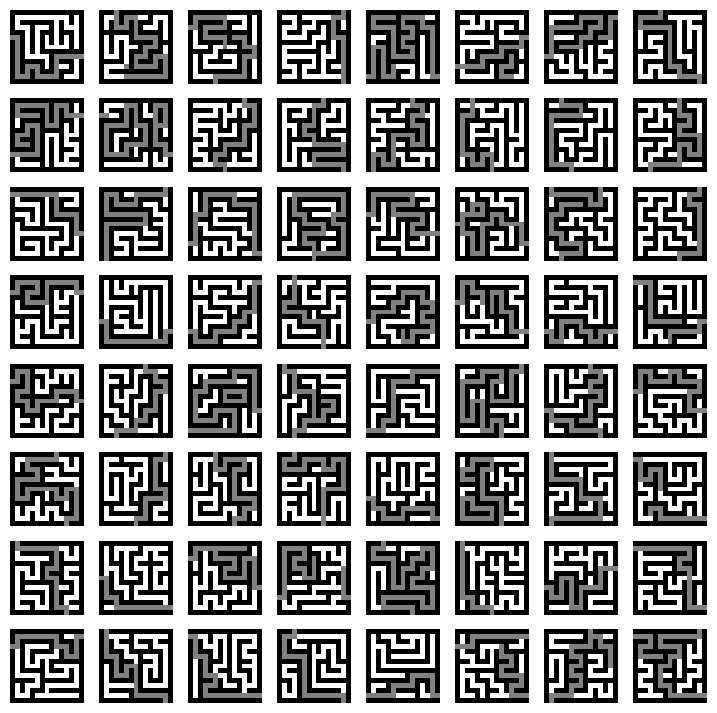

In [ ]:
is_img = cfg.data.is_img

if is_img:
    samples = samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size)
    saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    fig = plt.figure(figsize=(9, 9)) 
    for i in range(n_samples):
        plt.subplot(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), 1 + i)
        plt.axis("off")
        plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")
 
 
    plt.savefig(saving_train_path)
    plt.show()
    plt.close()
else:
    bm, inv_bm = synthetic.get_binmap(cfg.model.concat_dim, cfg.data.binmode)
    print(inv_bm)
    samples = synthetic.bin2float(samples.astype(np.int32), inv_bm, cfg.model.concat_dim, cfg.data.int_scale)
 
    saving_plot_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    #aving_plot_path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/TAUnSDDM/SavedModels/MNIST/'
    synthetic.plot_samples(samples, saving_plot_path, im_size=cfg.data.plot_size, im_fmt="png")